In [1]:
from stats_can import StatsCan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#seaborn theme
import seaborn as sns
sns.set(font='Arial')

C:\Users\Maln\AppData\Roaming\Python\Python37\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.7) or chardet (4.0.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [3]:
sc = StatsCan()
#sc.update_tables()
estimates = sc.table_to_df('17-10-0005-01')


17100005-eng.zip: 100%|██████████| 3.58M/3.58M [00:06<00:00, 566kB/s]


In [4]:
projection = sc.table_to_df('17-10-0057-01')

17100057-eng.zip: 100%|██████████| 21.5M/21.5M [00:18<00:00, 1.14MB/s]


In [8]:
estimates = estimates.set_index('REF_DATE')
estimates = estimates[estimates['GEO']=='Alberta']

In [15]:
estimates = estimates['1990':][['GEO','Sex', 'Age group','VALUE','UOM']]

In [17]:
estimates = estimates[estimates['UOM']=='Persons']

In [19]:
estimates=estimates[estimates['Sex']=='Both sexes']

In [24]:
estimates = estimates.pivot(columns='Age group',values='VALUE')

In [36]:
estimates.columns = estimates.columns.add_categories('18 to 29 years')
estimates['18 to 29 years']=estimates['18 to 24 years'] + estimates['25 to 29 years']

In [89]:
estimates[['All ages','18 years and over','18 to 29 years']].diff(1)
estimates[['All ages','18 years and over','18 to 29 years']].to_csv('pop_estimate_ab.csv')

In [42]:
projection = projection.set_index('REF_DATE')
projection=projection[projection['GEO']=='Alberta']
projection = projection['2023':'2030'][['GEO','Sex', 'Age group','VALUE','UOM','Projection scenario']]
projection = projection[projection['UOM']=='Persons']

In [46]:
projection['Projection scenario'].unique()

array(['Projection scenario LG: low-growth',
       'Projection scenario M1: medium-growth',
       'Projection scenario M2: medium-growth',
       'Projection scenario M3: medium-growth',
       'Projection scenario M4: medium-growth',
       'Projection scenario M5: medium-growth',
       'Projection scenario M6: medium-growth',
       'Projection scenario HG: high-growth',
       'Projection scenario SA: slow-aging',
       'Projection scenario FA: fast-aging'], dtype=object)

In [49]:
projection=projection[projection['Sex']=='Both sexes']

<AxesSubplot:xlabel='REF_DATE'>

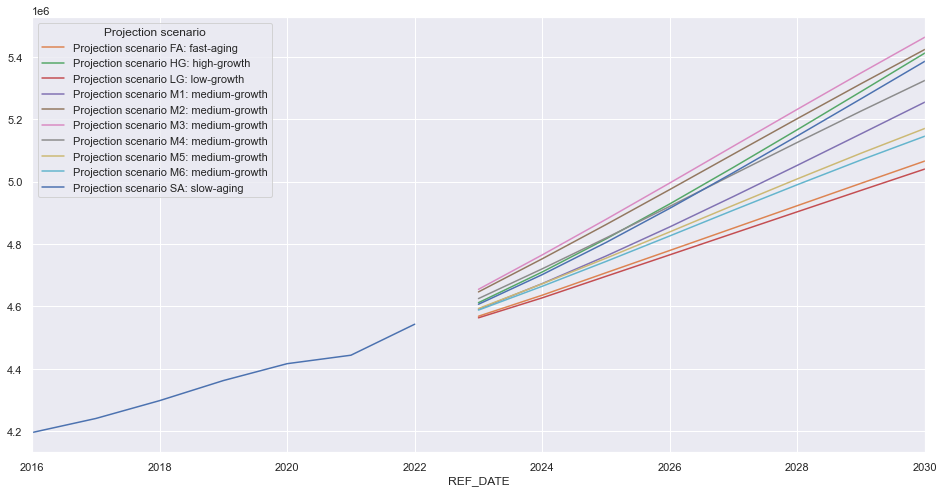

In [58]:
fig,ax=plt.subplots(figsize=(16,8))
estimates['All ages']['2016':].plot(ax=ax)
(projection[projection['Age group']=='All ages'].pivot(columns='Projection scenario',values='VALUE')*1000).plot(ax=ax)

In [43]:
med_projection =projection[projection['Projection scenario']=='Projection scenario M3: medium-growth']

,GEO,Sex,Age group,VALUE,UOM,Projection scenario
REF_DATE,,,,,,
2023-01-01,Alberta,Both sexes,All ages,4563.6,Persons,Projection scenario LG: low-growth
2023-01-01,Alberta,Both sexes,0 to 14 years,812.9,Persons,Projection scenario LG: low-growth
2023-01-01,Alberta,Both sexes,0 to 4 years,245.9,Persons,Projection scenario LG: low-growth
2023-01-01,Alberta,Both sexes,Under 1 year,46.3,Persons,Projection scenario LG: low-growth
2023-01-01,Alberta,Both sexes,1 year,47.3,Persons,Projection scenario LG: low-growth
...,...,...,...,...,...,...
2030-01-01,Alberta,Females,96 years,1.5,Persons,Projection scenario FA: fast-aging
2030-01-01,Alberta,Females,97 years,1.2,Persons,Projection scenario FA: fast-aging
2030-01-01,Alberta,Females,98 years,0.9,Persons,Projection scenario FA: fast-aging


In [63]:
projection['VALUE'] = projection['VALUE']*1000

c:\Users\Maln\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
(projection[projection['Age group']=='All ages'].pivot(columns='Projection scenario',values='VALUE')).to_csv('pop_forecast_all.csv')

In [65]:
(projection[projection['Age group']=='18 to 24 years'].pivot(columns='Projection scenario',values='VALUE'))+(projection[projection['Age group']=='25 to 29 years'].pivot(columns='Projection scenario',values='VALUE')).to_csv('pop_forecast_18-29.csv')

Projection scenario
REF_DATE


In [92]:
medium_project = projection[projection['Projection scenario']=='Projection scenario M2: medium-growth'].pivot(columns='Age group',values='VALUE')

In [93]:
medium_project.columns = medium_project.columns.add_categories('18 to 29 years')
medium_project['18 to 29 years']=medium_project['20 to 24 years'] + medium_project['25 to 29 years']+medium_project['15 to 19 years']-medium_project['15 years']-medium_project['16 years']-medium_project['17 years']

In [94]:
medium_project.columns = medium_project.columns.add_categories('18 years and over')
medium_project['18 years and over']=medium_project['All ages'] - medium_project['0 to 14 years']-medium_project['15 to 19 years']+medium_project['18 years']-medium_project['19 years']

In [95]:
medium_project[['All ages','18 years and over','18 to 29 years']].to_csv('m2_pop_fcast.csv')

In [98]:
m2_pop = estimates[['All ages','18 years and over','18 to 29 years']].append(medium_project[['All ages','18 years and over','18 to 29 years']])

In [101]:
medium_project = projection[projection['Projection scenario']=='Projection scenario M3: medium-growth'].pivot(columns='Age group',values='VALUE')
medium_project.columns = medium_project.columns.add_categories('18 to 29 years')
medium_project['18 to 29 years']=medium_project['20 to 24 years'] + medium_project['25 to 29 years']+medium_project['15 to 19 years']-medium_project['15 years']-medium_project['16 years']-medium_project['17 years']
medium_project.columns = medium_project.columns.add_categories('18 years and over')
medium_project['18 years and over']=medium_project['All ages'] - medium_project['0 to 14 years']-medium_project['15 to 19 years']+medium_project['18 years']-medium_project['19 years']

In [102]:
m3_pop = estimates[['All ages','18 years and over','18 to 29 years']].append(medium_project[['All ages','18 years and over','18 to 29 years']])

In [105]:
m2_pop.to_csv('m2_pop_est.csv')
m3_pop.to_csv('m3_pop_est.csv')